In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import missingno as msno
from worldBank.data_processing import DataProcessing

In [3]:
data = pd.read_csv("./data/CountryWorldBank.csv")
world_bank = DataProcessing(data=data)

In [4]:
data.head(5)

,Country,Access to electricity (% of population),"Birth rate, crude (per 1,000 people)",Domestic private health expenditure (% of current health expenditure),"Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)",Expense (% of GDP),"Fertility rate, total (births per woman)",Fixed broadband subscriptions (per 100 people),GDP (current US$),GDP per capita (current US$),...,Military expenditure (current USD),Mobile cellular subscriptions (per 100 people),Net migration,Population ages 65 and above (% of total population),Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total reserves minus gold (current US$),Unemployment with basic education (% of total labor force with basic education),Urban population (% of total population)
0,Afghanistan,97.7,36.051,76.231537,7.339715,NaN,4.750,0.068008,1.995593e+10,510.787063,...,2.795770e+08,58.190214,143634,2.370734,27.016129,72278.0,0.011,8.419488e+09,11.103,26.026
1,Albania,100.0,10.285,59.477894,NaN,24.604816,1.400,17.720900,1.524146e+10,5370.778623,...,1.965963e+08,91.350501,-16680,14.767004,29.508197,105.0,4.470,4.647187e+09,9.346,62.112
2,Algeria,99.7,22.431,38.965740,NaN,NaN,2.942,8.606450,1.650000e+11,3743.541952,...,9.708277e+09,104.842178,-10798,5.894089,25.757576,97651.0,0.540,4.888205e+10,NaN,73.733
3,American Samoa,NaN,12.700,NaN,NaN,NaN,NaN,NaN,7.210000e+08,14489.258660,...,NaN,NaN,-653,6.365363,NaN,NaN,NaN,NaN,NaN,87.153
4,Andorra,100.0,NaN,27.383091,NaN,NaN,NaN,48.656000,2.891001e+09,37361.090070,...,NaN,103.449163,572,14.216852,46.428571,NaN,9.680,NaN,NaN,87.916


In [5]:
data.describe()

,Access to electricity (% of population),"Birth rate, crude (per 1,000 people)",Domestic private health expenditure (% of current health expenditure),"Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)",Expense (% of GDP),"Fertility rate, total (births per woman)",Fixed broadband subscriptions (per 100 people),GDP (current US$),GDP per capita (current US$),Government Effectiveness: Estimate,...,Military expenditure (current USD),Mobile cellular subscriptions (per 100 people),Net migration,Population ages 65 and above (% of total population),Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total reserves minus gold (current US$),Unemployment with basic education (% of total labor force with basic education),Urban population (% of total population)
count,215.000000,214.000000,187.000000,101.000000,137.000000,211.000000,201.000000,2.090000e+02,210.000000,205.000000,...,1.540000e+02,208.000000,2.170000e+02,217.000000,190.000000,1.630000e+02,185.000000,1.690000e+02,100.000000,215.000000
mean,86.691163,18.680532,36.754729,73.134617,30.686727,2.525814,16.388181,4.058013e+11,17592.632850,-0.032847,...,1.248446e+10,107.710466,1.133364e+02,9.667620,23.847937,1.617507e+05,5.021508,7.376005e+10,10.943000,61.415721
std,24.102101,9.724461,18.667494,24.235934,14.074163,1.273488,15.362499,1.871490e+12,25986.306231,0.994811,...,6.668676e+10,41.944965,1.102384e+05,6.766386,12.295544,4.745291e+05,3.853712,2.905582e+11,8.267148,23.858148
min,7.300000,5.300000,2.661578,1.645413,0.000213,0.837000,0.000000,5.174659e+07,210.008140,-2.362375,...,0.000000e+00,12.671801,-1.002522e+06,1.247693,0.000000,8.000000e+00,0.000000,3.193753e+07,0.050000,13.345000
25%,86.200000,10.587250,22.901363,58.080002,20.164783,1.557500,1.672110,6.684226e+09,2209.623617,-0.730157,...,1.681852e+08,84.041534,-9.208000e+03,3.869704,14.920213,7.205000e+02,1.710000,1.079922e+09,4.967750,42.791500
50%,100.000000,15.666500,35.700000,81.139999,29.928140,2.050000,11.765000,2.534353e+10,6567.733000,-0.126769,...,6.551852e+08,108.209756,-2.010000e+02,7.447095,22.557928,5.578000e+03,4.280000,6.199282e+09,9.140000,62.381000
75%,100.000000,25.811500,49.137899,94.483398,39.046477,3.257000,29.314100,1.710000e+11,23167.535900,0.632649,...,4.796486e+09,129.477169,6.967000e+03,14.927196,31.159454,9.475200e+04,7.990000,3.915118e+10,14.035500,80.981500
max,100.000000,45.588000,82.094597,99.843040,103.725787,6.892000,58.079200,2.140000e+13,176891.886500,2.284203,...,7.780000e+11,412.992786,3.699010e+05,36.463384,61.250000,3.652362e+06,16.800000,3.240000e+12,35.479000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 28 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country                                                                                               217 non-null    object 
 1   Access to electricity (% of population)                                                               215 non-null    float64
 2   Birth rate, crude (per 1,000 people)                                                                  214 non-null    float64
 3   Domestic private health expenditure (% of current health expenditure)                                 187 non-null    float64
 4   Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)   10

In [7]:
# Check duplicates
data.duplicated().sum()

0

In [8]:
missing_percentage = world_bank.missing_values()

                                                    Missing Count  \
Literacy rate, adult total (% of people ages 15...            183   
Unemployment with basic education (% of total l...            117   
Educational attainment, at least completed lowe...            116   
Intentional homicides (per 100,000 people)                     91   
Expense (% of GDP)                                             80   
Military expenditure (current USD)                             63   
Gross savings (% of GDP)                                       58   
Refugee population by country or territory of a...             54   
Total reserves minus gold (current US$)                        48   
Gross national expenditure (% of GDP)                          46   
Human capital index (HCI) (scale 0-1)                          43   
Total alcohol consumption per capita (liters of...             32   
Labor force participation rate, total (% of tot...             30   
Domestic private health expenditur

<Axes: >

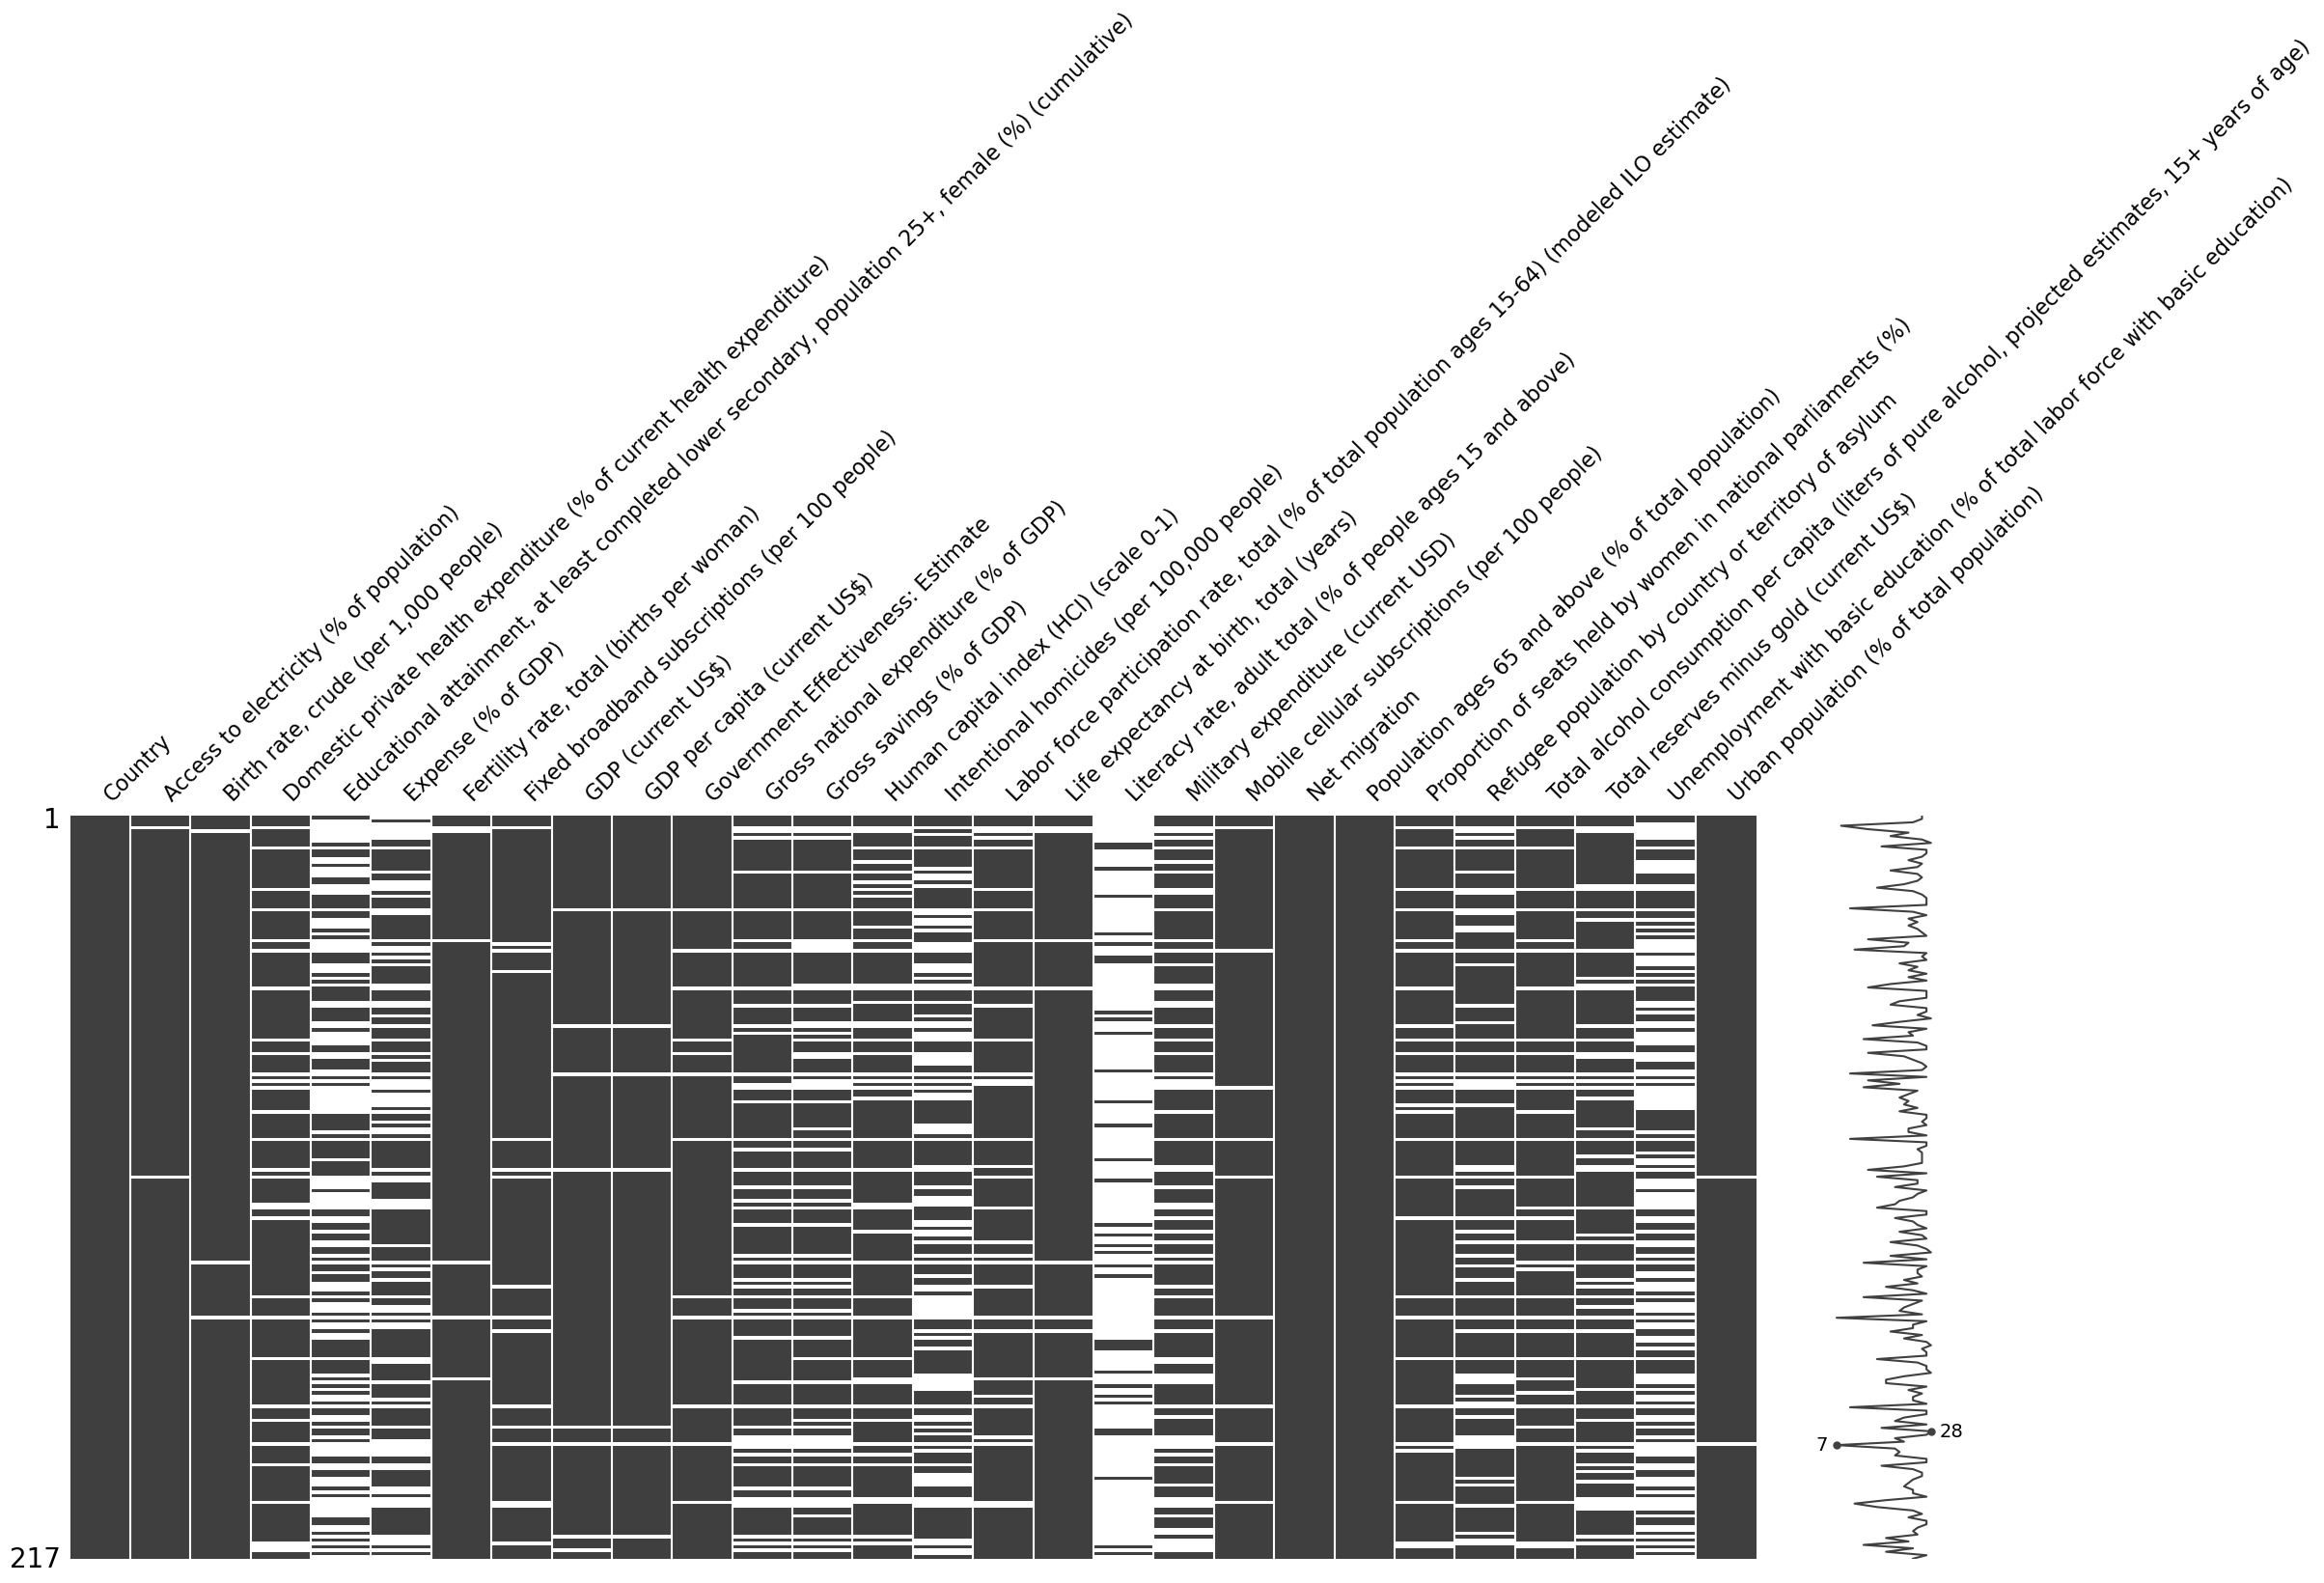

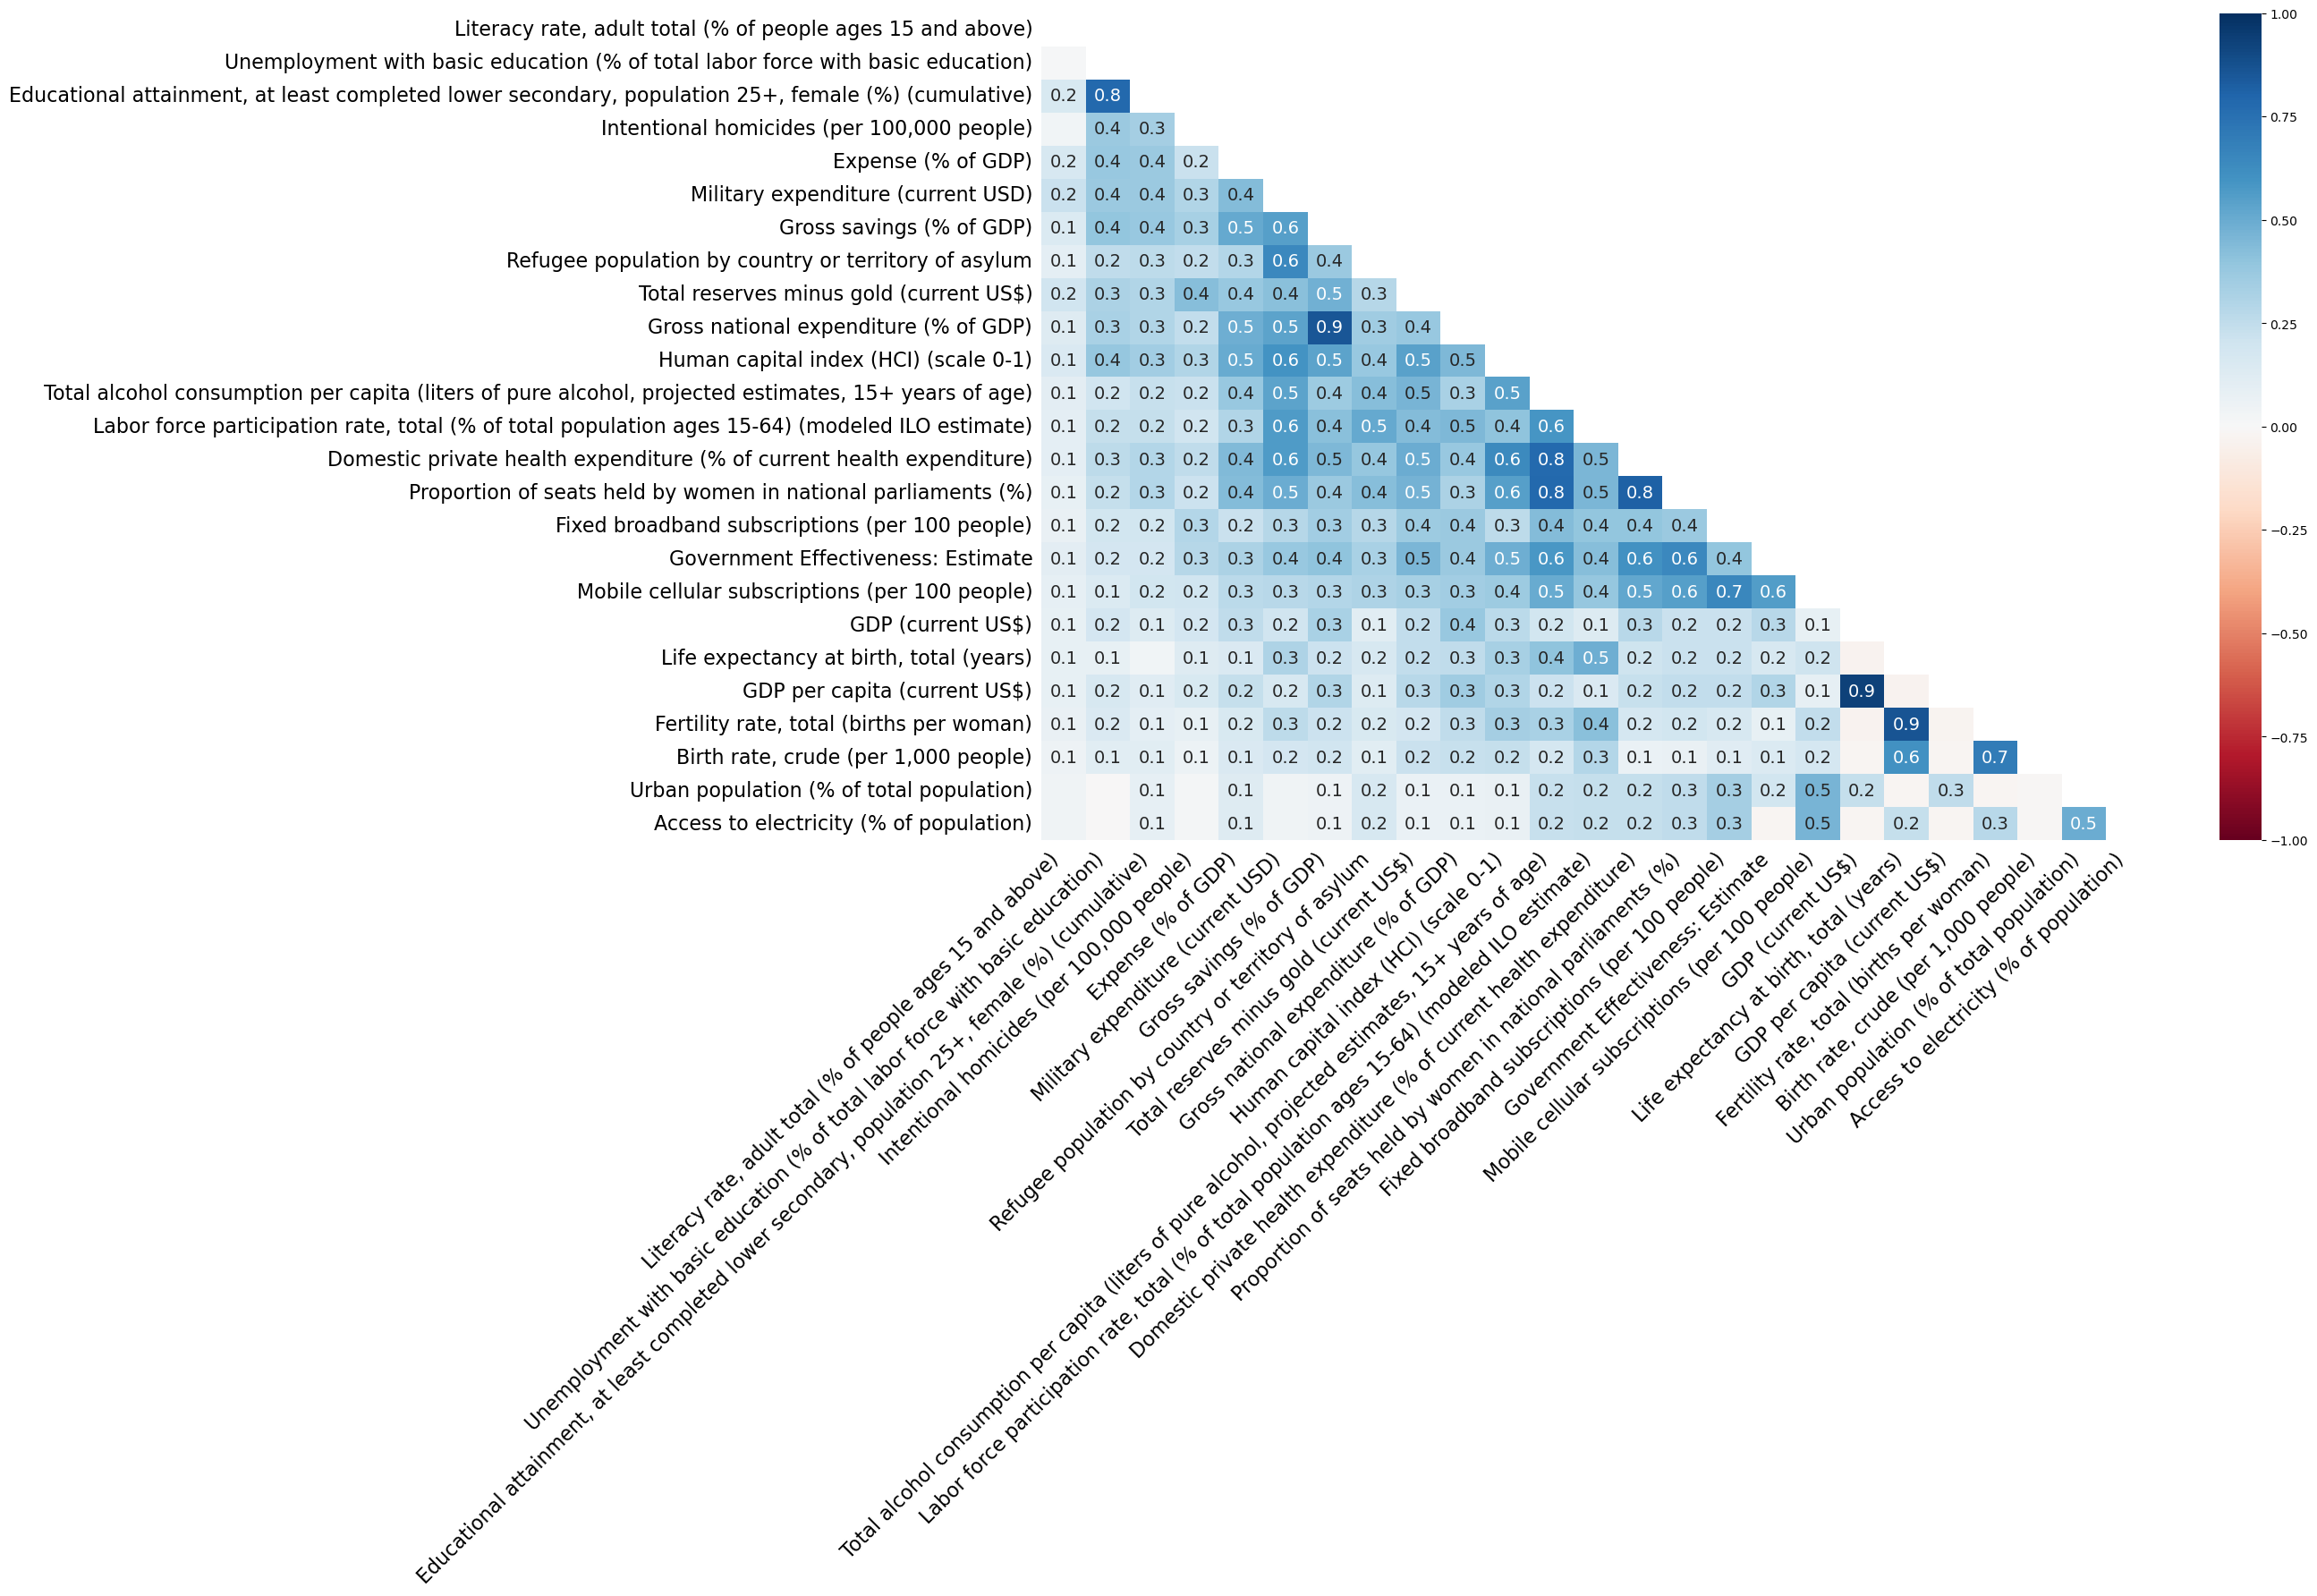

In [9]:
msno.matrix(data) 
msno.heatmap(data, sort="ascending")

In [10]:
missing_values_df = world_bank.drop_missing_values_range(missing_percentage, 80)

Columns that was dropped: ['Literacy rate, adult total (% of people ages 15 and above)']


In [11]:
corr_features_df = missing_values_df.drop(columns=[
    'Fertility rate, total (births per woman)',
    'GDP per capita (current US$)',
    'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)',
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'
])

<Axes: >

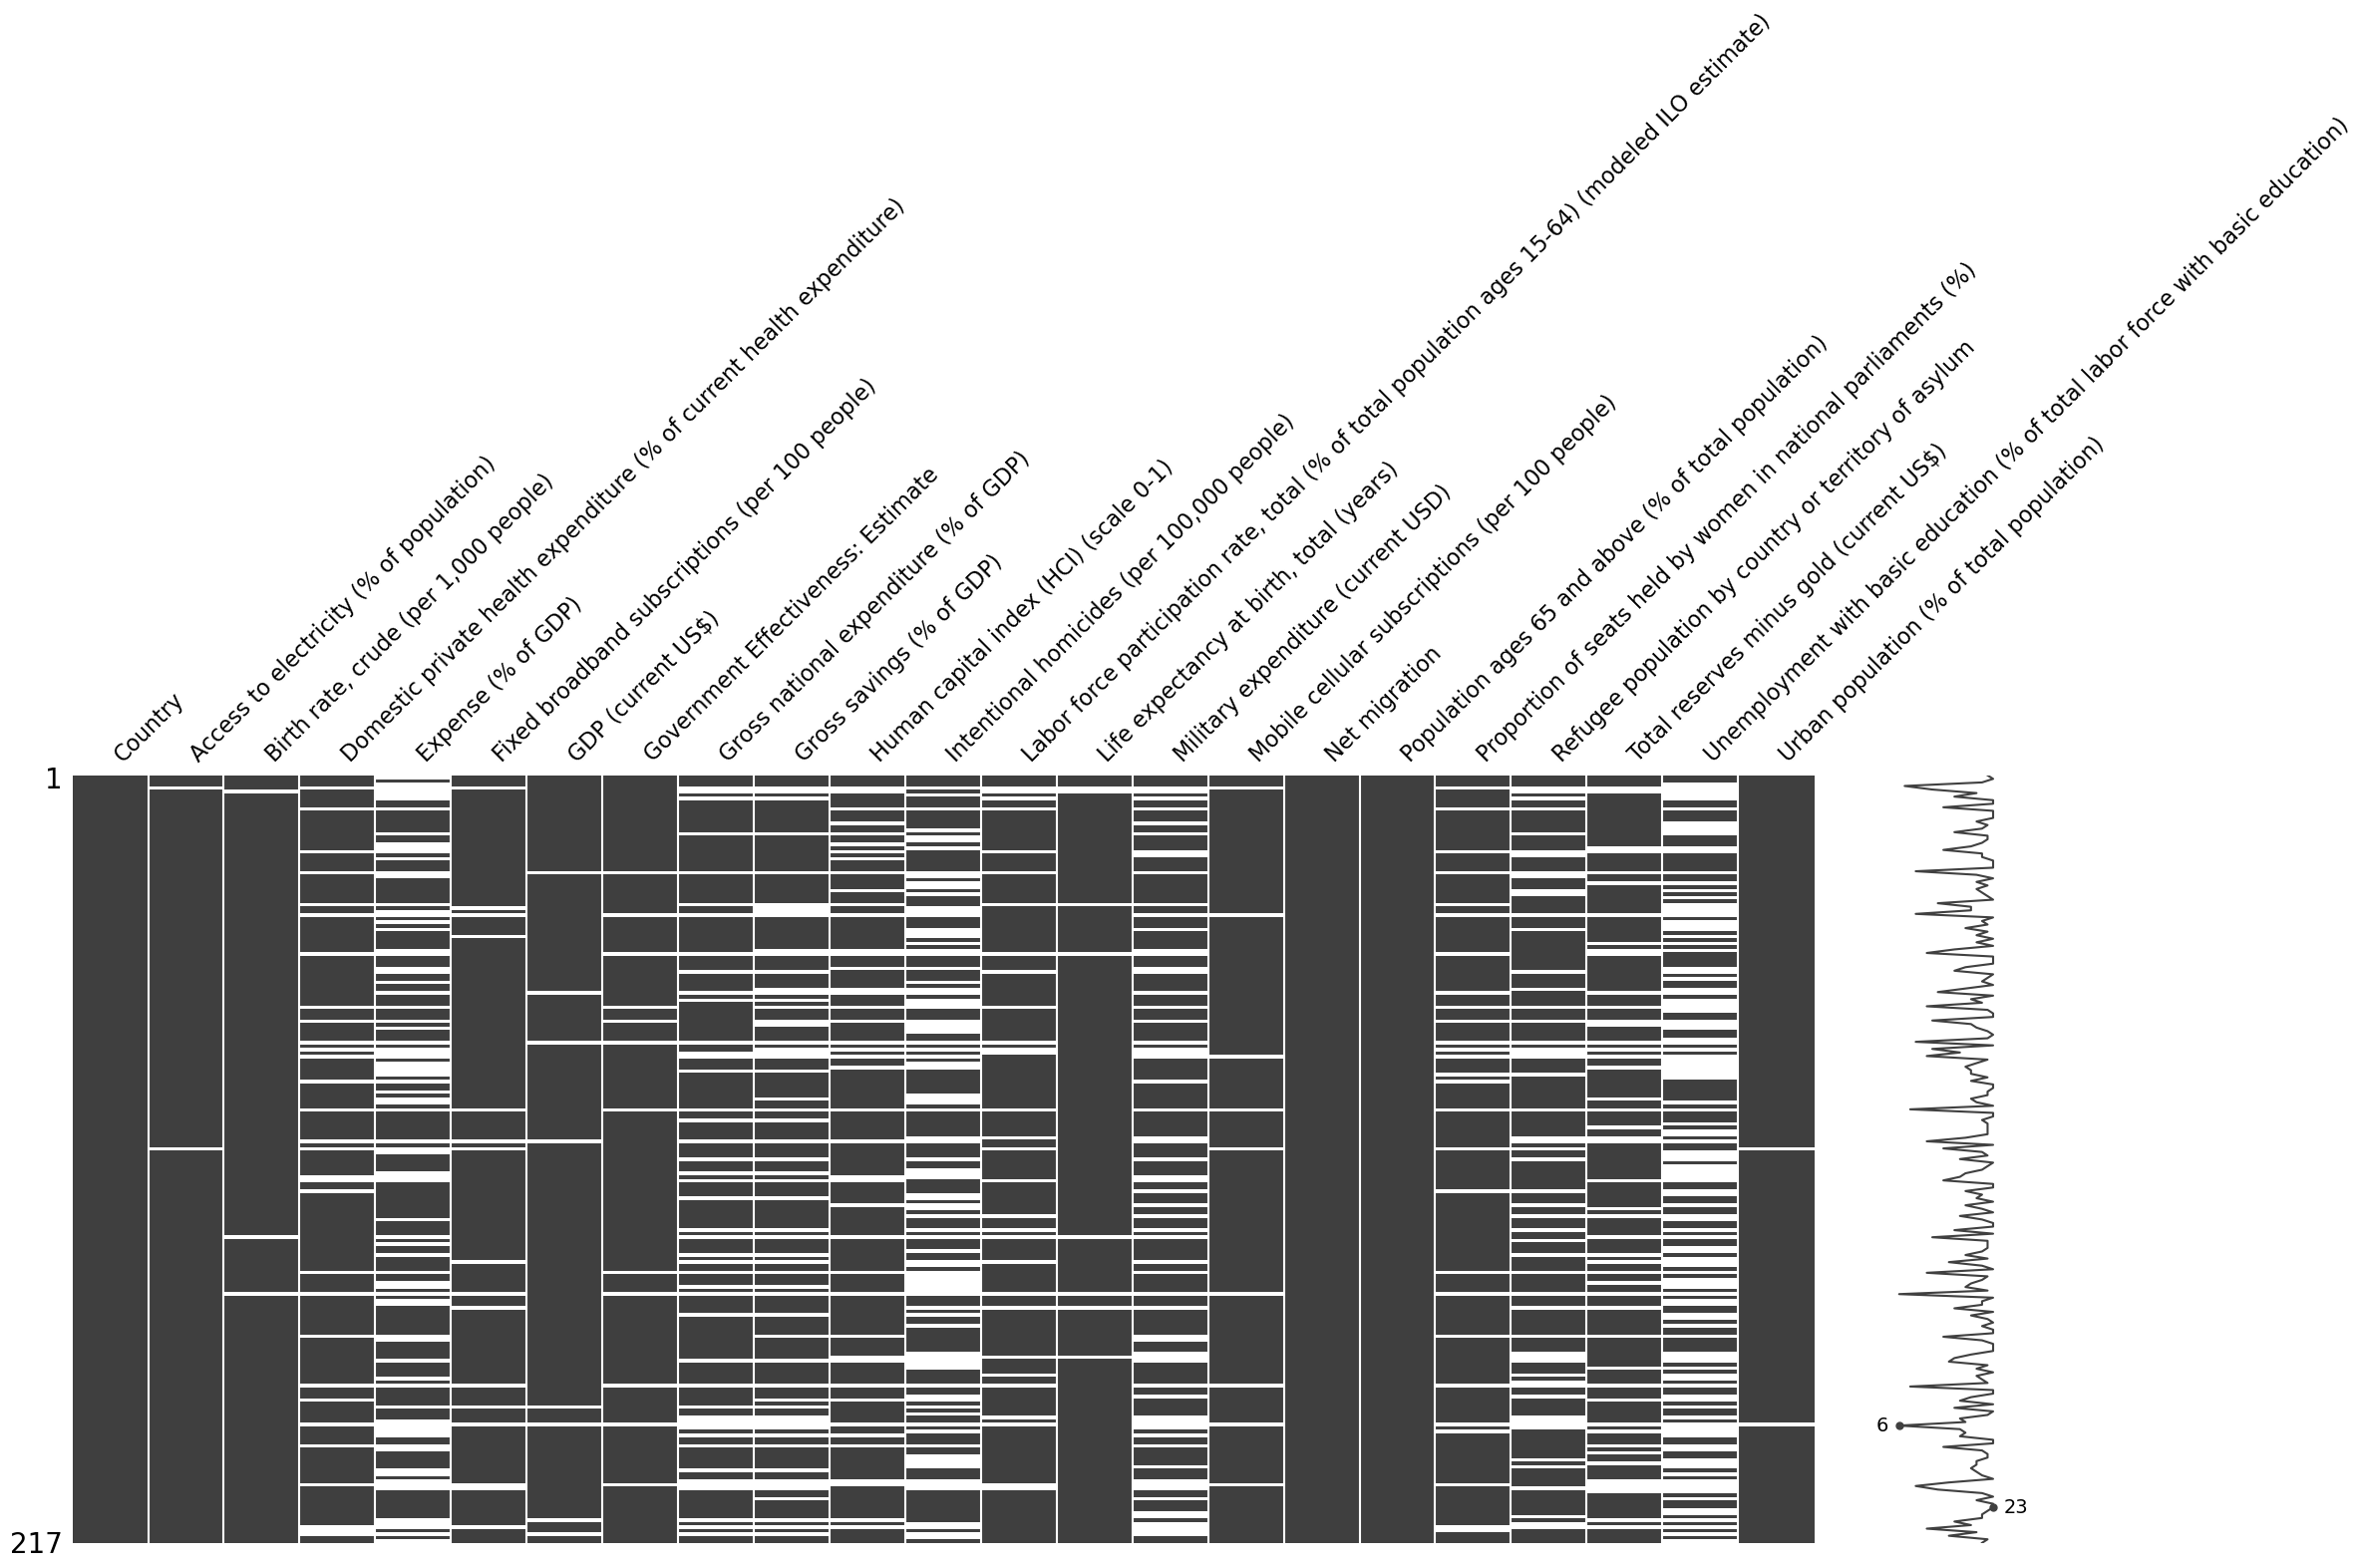

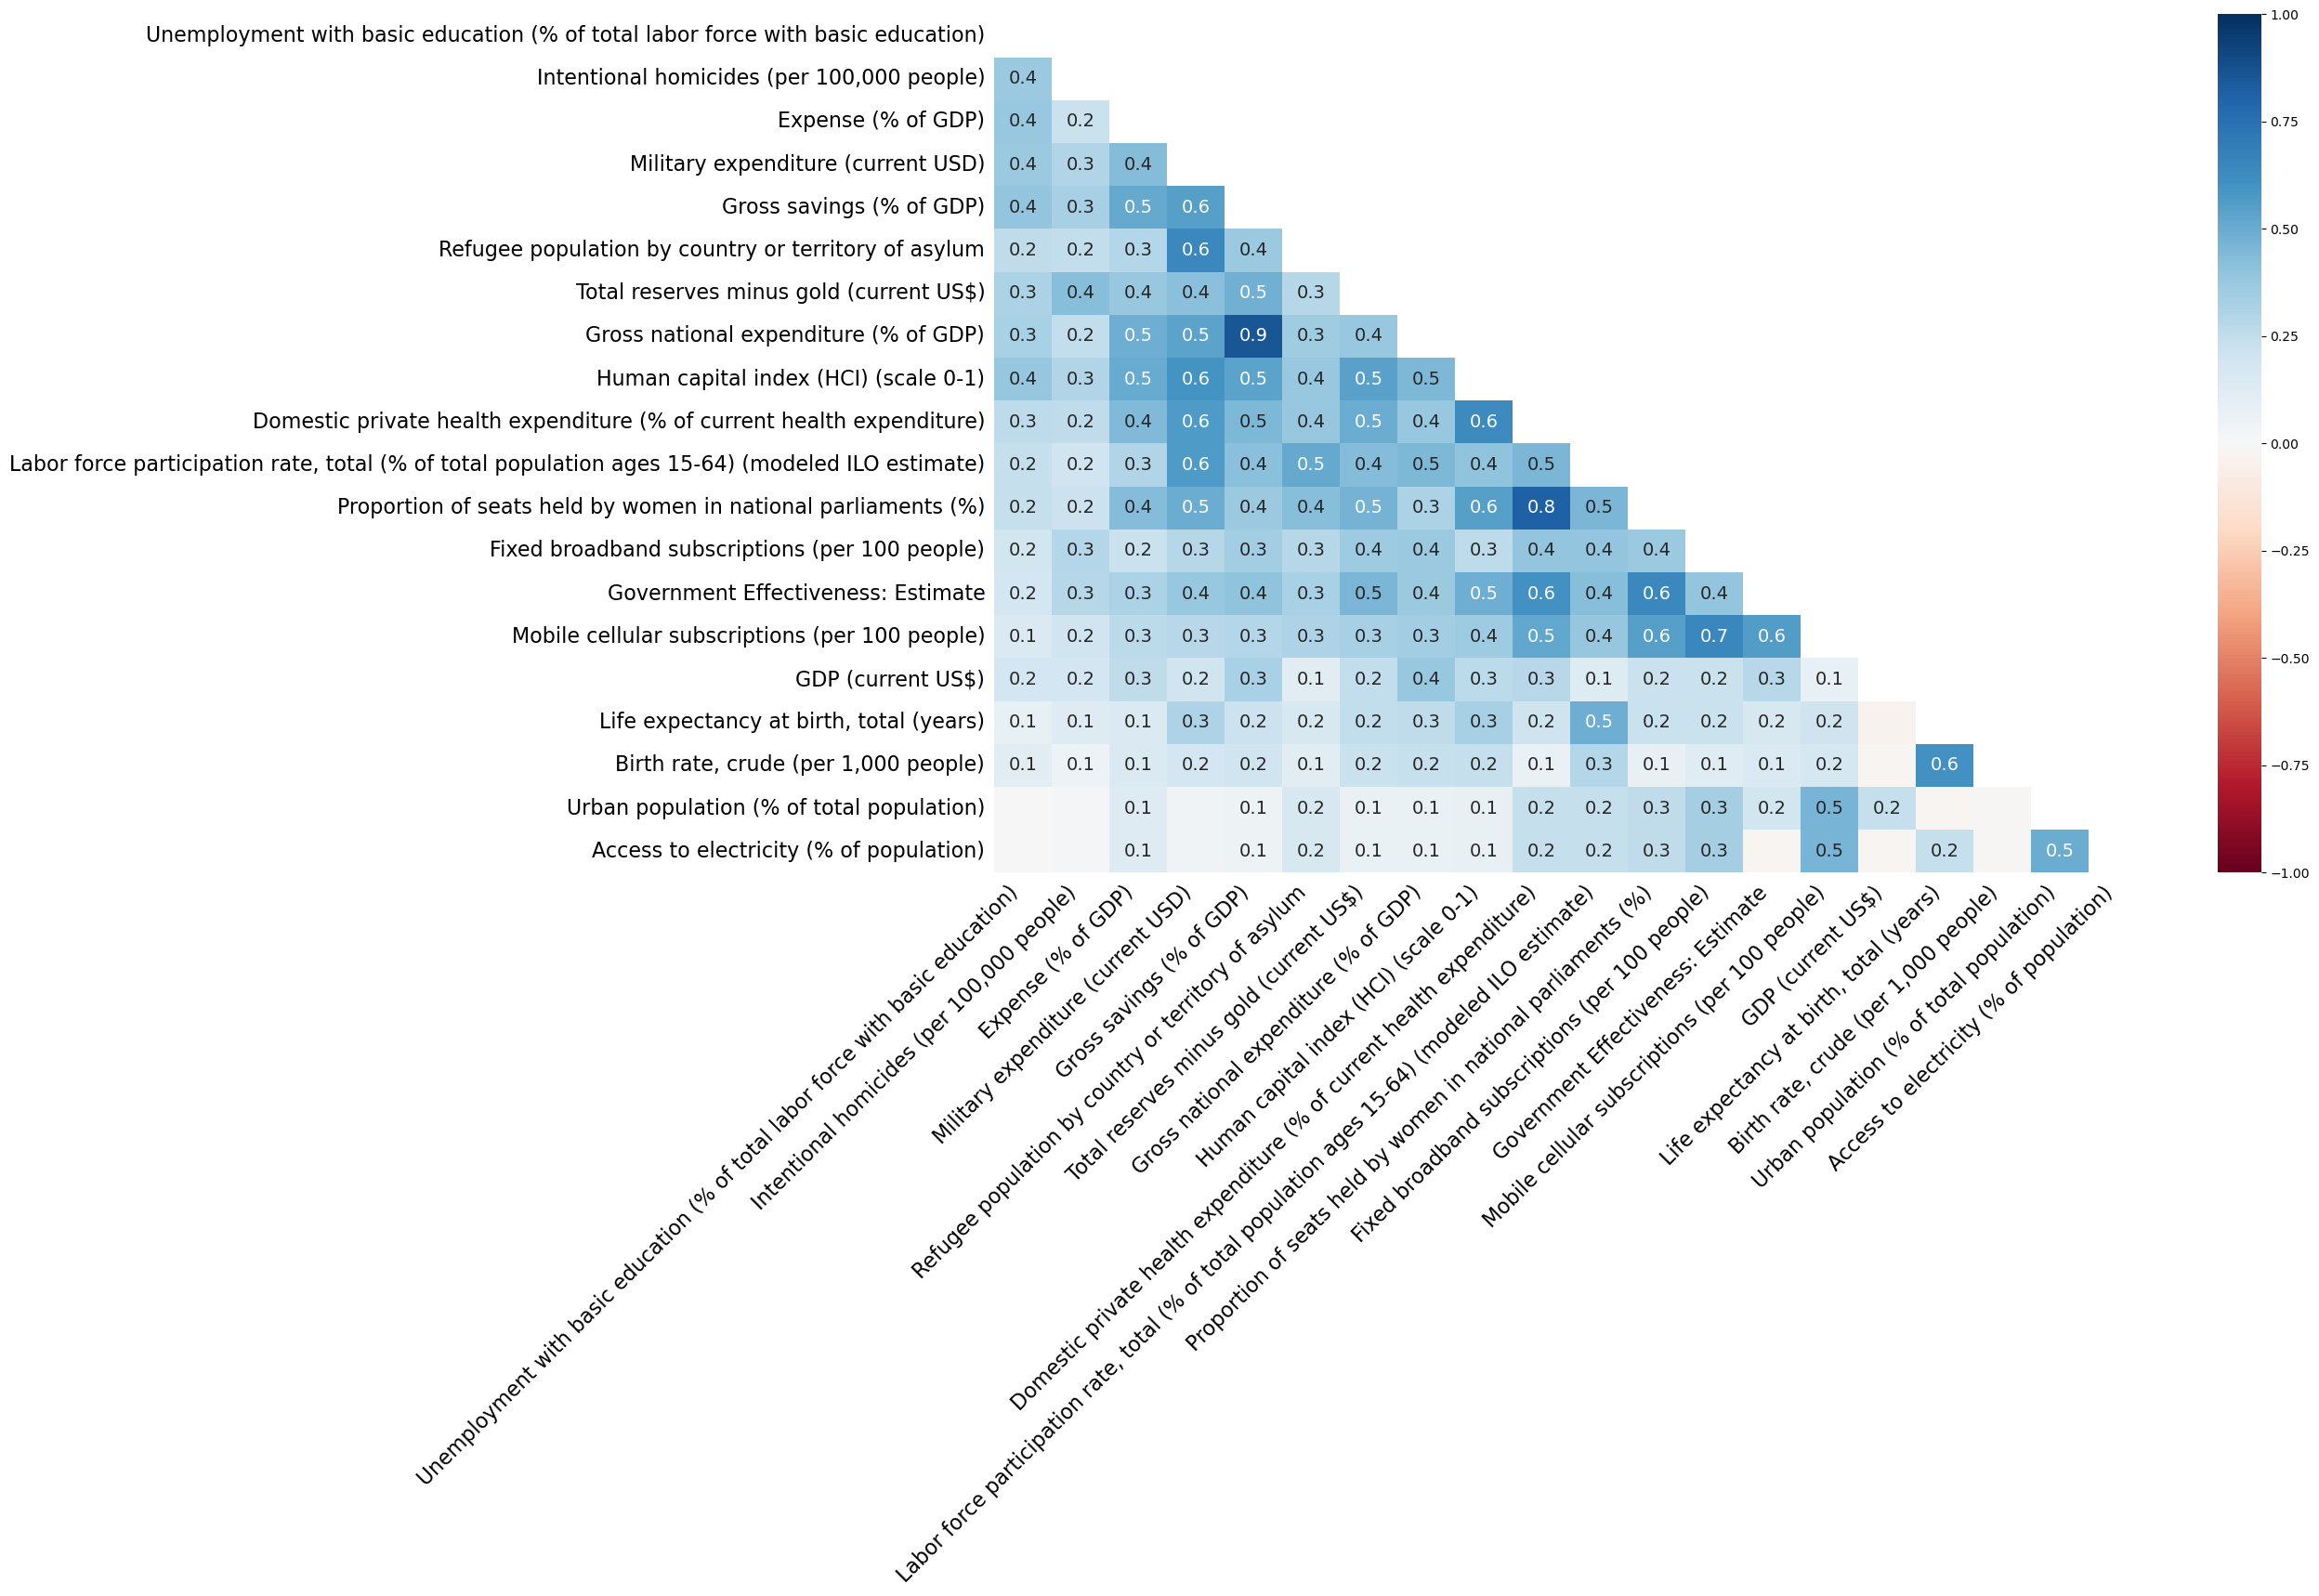

In [12]:
msno.matrix(corr_features_df)
msno.heatmap(corr_features_df, sort="ascending")

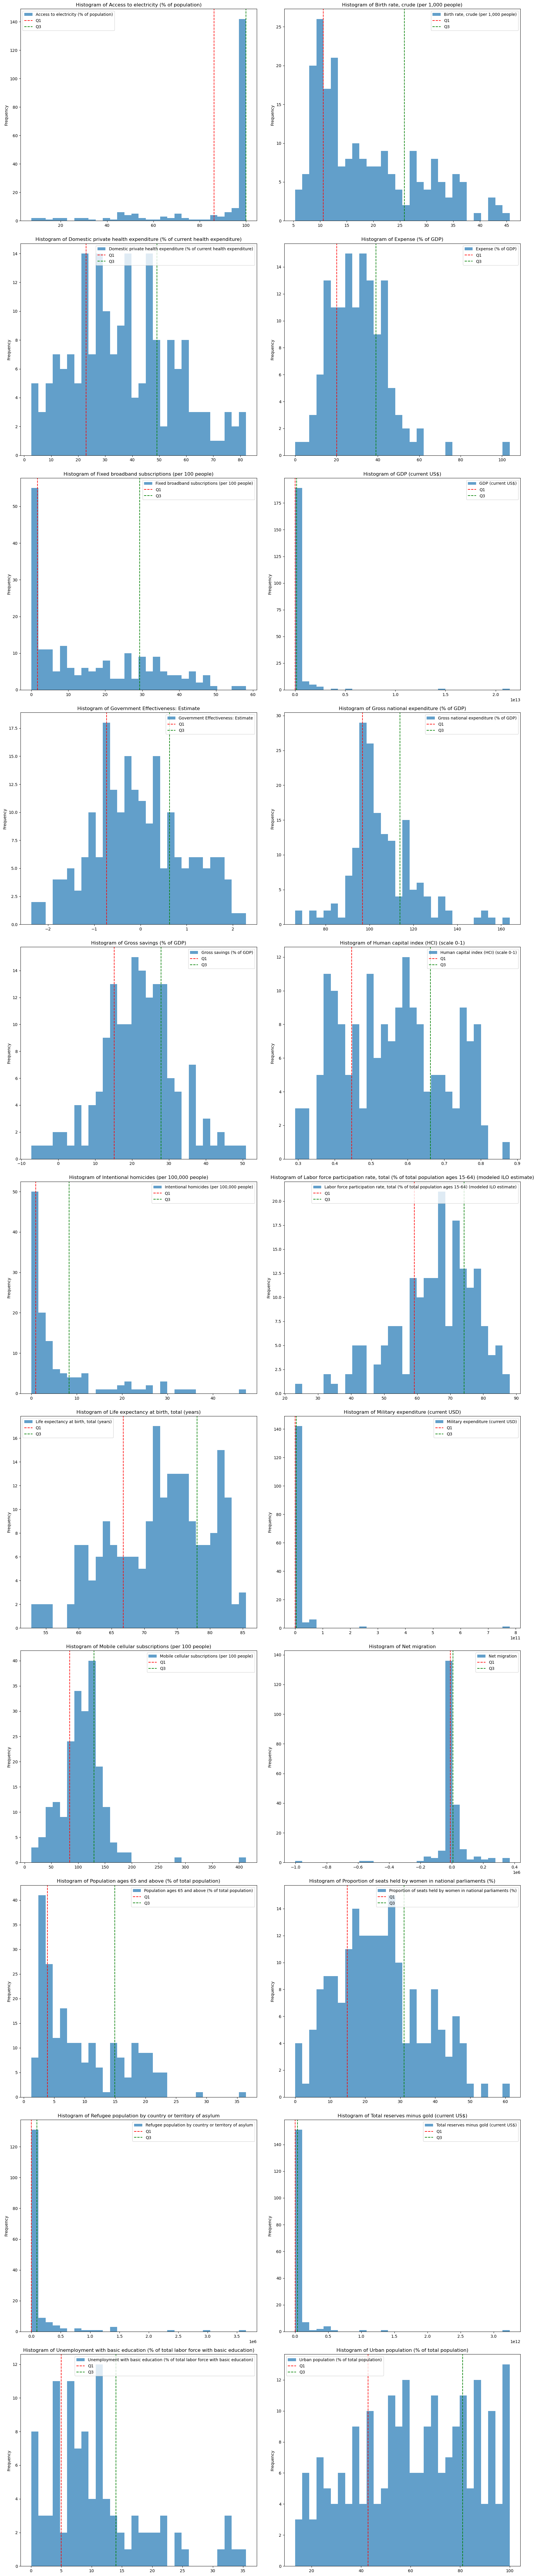

In [13]:
# Assume 'columns_with_outliers' is defined as:
columns_with_outliers = corr_features_df.select_dtypes(include=['float64', 'int64']).columns

# Decide on a grid layout; here we choose 3 columns per row.
n_cols = 2
n_rows = math.ceil(len(columns_with_outliers) / n_cols)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 8))
# Flatten axes array for easy iteration in case n_rows or n_cols is > 1
axes = axes.flatten()

# Loop over each column and plot the histogram with Q1 and Q3 lines
for ax, column in zip(axes, columns_with_outliers):
    # Plot histogram on the current axes (ax)
    data[column].plot(kind='hist', bins=30, alpha=0.7, ax=ax, title=f"Histogram of {column}")
    # Draw Q1 and Q3 vertical lines
    ax.axvline(data[column].quantile(0.25), color='red', linestyle='--', label='Q1')
    ax.axvline(data[column].quantile(0.75), color='green', linestyle='--', label='Q3')
    ax.legend()

# Turn off any remaining empty subplots (if the total number of columns is not a multiple of n_cols)
for i in range(len(columns_with_outliers), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()